In [35]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target

In [2]:
print (X_iris.shape, y_iris.shape)
print (X_iris[0], y_iris[0])

(150, 4) (150,)
[ 5.1  3.5  1.4  0.2] 0


In [7]:
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

In [8]:
# Get dataset with only the first two attributes
X, y = X_iris[:, :2], y_iris

In [9]:
# Split the dataset into a training and a testing set
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
print (X_train.shape, y_train.shape)

(112, 2) (112,)


In [10]:
# Standardize the features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

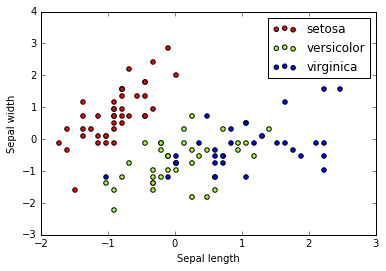

In [21]:
colors = ['red', 'greenyellow', 'blue']
for i in iter(range(len(colors))):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colors[i])
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [22]:
# To implement linear classification, we will use the SGDClassifier from scikit-learn.

SGD stands for Stochastic Gradient Descent, a very popular numerical procedure
to find the local minimum of a function (in this case, the loss function, which
measures how far every instance is from our boundary). The algorithm will learn the
coefficients of the hyperplane by minimizing the loss function.

In [24]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

The coef_ attribute of the clf object (consider, for
the moment, only the first row of the matrices), now has the coefficients of the linear
boundary and the intercept_ attribute, the point of intersection of the line with the
y axis.

In [31]:
print (clf.coef_)
print (clf.intercept_)

[[-26.9518696   21.10103404]
 [  5.09756348 -12.8156682 ]
 [  7.45335653  -6.78334045]]
[-11.15040158  -8.91770215  -4.25815189]


in the real plane, with these three values, we can draw a line, represented by
the following equation:
-11.15040158 -26.9518696  * x1 + 21.10103404 * x2 = 0

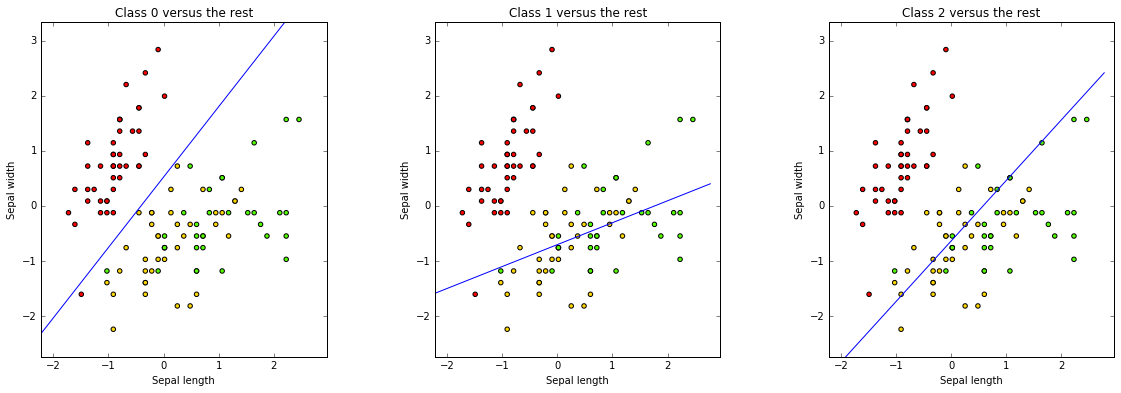

In [42]:
# The following code draws the three decision boundaries and lets us know if they worked as expected:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xs = np.arange(x_min, x_max, 0.5)
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(20, 6)
for i in [0, 1, 2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    plt.sca(axes[i])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.prism)
    ys = (-clf.intercept_[i] - xs * clf.coef_[i, 0]) / clf.coef_[i, 1]
    plt.plot(xs, ys, hold=True)

Now, the end of the story: suppose that we have a new flower with a sepal width of
4.7 and a sepal length of 3.1, and we want to predict its class. We just have to apply
our brand new classifier to it (after normalizing!). The predict method takes
an array of instances (in this case, with just one element) and returns a list of
predicted classes:

In [45]:
print (clf.predict(scaler.transform([[4.7, 3.1]])))

[0]


Our prediction procedure combines the result of the three binary classifiers and selects the class in which it is
more confident. In this case, we will select the boundary line whose distance to the
instance is longer. We can check that using the classifier decision_function method:

In [46]:
print (clf.decision_function(scaler.transform([[4.7, 3.1]])))

[[ 24.78791255 -16.54816768 -14.28615971]]


In [47]:
# Evaluating our results

In [48]:
from sklearn import metrics
y_train_pred = clf.predict(X_train)
print (metrics.accuracy_score(y_train, y_train_pred))

0.767857142857


In [49]:
# Let's check the accuracy again, now on the evaluation set (recall that it was already scaled):

In [50]:
y_pred = clf.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.684210526316


With m being the sample size (that is, TP + TN + FP + FN), we have the
following formulae:
Accuracy = (TP + TN) / m
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F1-score = 2 * Precision * Recall / (Precision + Recall)

In [51]:
print (metrics.classification_report(y_test, y_pred, target_names=iris.target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         8
 versicolor       0.33      0.09      0.14        11
  virginica       0.63      0.89      0.74        19

avg / total       0.62      0.68      0.62        38



Another useful metric (especially for multi-class problems) is the confusion matrix:
in its (i, j) cell, it shows the number of class instances i that were predicted to
be in class j. A good classifier will accumulate the values on the confusion matrix
diagonal, where correctly classified instances belong.

In [52]:
print (metrics.confusion_matrix(y_test, y_pred))

[[ 8  0  0]
 [ 0  1 10]
 [ 0  2 17]]
